# Demo: Using `create_odds_ratios` in the vivainsights Python Package

This notebook demonstrates how to use the `create_odds_ratios` function from the **vivainsights** Python package. The function calculates odds ratios for ordinal metrics against a specified independent variable.

In this example, we will:
1. Load the demo data (`pq_data`) from the package.
2. Use `identify_usage_segments` to create a metric for the independent variable (`UsageSegments_12w`).
3. Compute favorability scores for ordinal metrics using `compute_fav`.
4. Calculate odds ratios for ordinal metrics against the independent variable using `create_odds_ratios`.
5. Visualize the results.

In [1]:
# Import necessary libraries
import vivainsights as vi
import pandas as pd
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

## Step 1: Load the demo data

We will load the sample Person Query dataset (`pq_data`) provided by the **vivainsights** package.

In [2]:
# Load the demo data
pq_data = vi.load_pq_data()

# Display the first few rows of the dataset
pq_data.head()

,PersonId,MetricDate,Collaboration_hours,Copilot_actions_taken_in_Teams,Meeting_and_call_hours,Internal_network_size,Email_hours,Channel_message_posts,Conflicting_meeting_hours,Large_and_long_meeting_hours,...,Summarise_chat_actions_taken_using_Copilot_in_Teams,Summarise_email_thread_actions_taken_using_Copilot_in_Outlook,Summarise_meeting_actions_taken_using_Copilot_in_Teams,Summarise_presentation_actions_taken_using_Copilot_in_PowerPoint,Summarise_Word_document_actions_taken_using_Copilot_in_Word,FunctionType,SupervisorIndicator,Level,Organization,LevelDesignation
0,bf361ad4-fc29-432f-95f3-837e689f4ac4,2024-03-31,17.452987,4,11.767599,92,7.523189,0.753451,2.079210,0.635489,...,2,0,0,0,0,Specialist,Manager,Level3,IT,Senior IC
1,0500f22c-2910-4154-b6e2-66864898d848,2024-03-31,32.860820,6,26.743370,193,11.578396,0.000000,8.106997,1.402567,...,2,0,4,1,0,Specialist,Manager,Level2,Legal,Senior Manager
2,bb495ec9-8577-468a-8b48-e32677442f51,2024-03-31,21.502359,8,13.982031,113,9.073214,0.894786,3.001401,0.000192,...,1,1,0,0,0,Manager,Manager,Level4,Legal,Junior IC
3,f6d58aaf-a2b2-42ab-868f-d7ac2e99788d,2024-03-31,25.416502,4,16.895513,131,10.281204,0.528731,1.846423,1.441596,...,0,0,0,0,0,Manager,Manager,Level1,HR,Executive
4,c81cb49a-aa27-4cfc-8211-4087b733a3c6,2024-03-31,11.433377,4,6.957468,75,5.510535,2.288934,0.474048,0.269996,...,0,0,1,0,0,Technician,Manager,Level1,Finance,Executive


## Step 2: Create the independent variable using `identify_usage_segments`

We will use the `identify_usage_segments` function to classify users into usage segments based on their Copilot actions. The independent variable (`UsageSegments_12w`) will be created using the `metric_str` method, aggregating all columns that start with `Copilot_actions_taken_in_`.

In [3]:
# Identify usage segments
usage_segments_data = vi.identify_usage_segments(
    data=pq_data,
    metric_str=[
        "Copilot_actions_taken_in_Teams",
        "Copilot_actions_taken_in_Outlook",
        "Copilot_actions_taken_in_Excel",
        "Copilot_actions_taken_in_Word",
        "Copilot_actions_taken_in_Powerpoint"
    ],
    version="12w",
    return_type="data"
)

# Display the first few rows of the updated dataset
usage_segments_data.head()

,PersonId,MetricDate,Collaboration_hours,Copilot_actions_taken_in_Teams,Meeting_and_call_hours,Internal_network_size,Email_hours,Channel_message_posts,Conflicting_meeting_hours,Large_and_long_meeting_hours,...,Level,Organization,LevelDesignation,target_metric,target_metric_l12w,target_metric_l4w,IsHabit12w,IsHabit4w,UsageSegments_12w,UsageSegments_4w
0,01986072-719a-404c-ae98-009d92e82323,2024-03-31,26.884733,7,17.700027,156,9.667004,0.117751,2.674868,1.262361,...,Level4,IT,Junior IC,10,10.00,10.00,False,False,Novice User,Novice User
1,01986072-719a-404c-ae98-009d92e82323,2024-04-07,21.280727,10,15.372990,121,8.417014,0.519473,0.368913,2.108141,...,Level4,IT,Junior IC,12,11.00,11.00,False,False,Novice User,Novice User
2,01986072-719a-404c-ae98-009d92e82323,2024-04-14,17.450330,8,11.808617,104,7.889519,1.907069,0.096829,0.853150,...,Level4,IT,Junior IC,11,11.00,11.00,False,False,Novice User,Novice User
3,01986072-719a-404c-ae98-009d92e82323,2024-04-21,21.368059,3,14.908550,115,6.776404,0.209775,3.953832,0.878616,...,Level4,IT,Junior IC,4,9.25,9.25,False,True,Novice User,Habitual User
4,01986072-719a-404c-ae98-009d92e82323,2024-04-28,20.849744,5,13.737000,110,8.759793,0.931585,1.201305,0.000000,...,Level4,IT,Junior IC,6,8.60,8.25,False,True,Novice User,Habitual User


### Visualize the mean of `target_metric` by `UsageSegments_12w`

To better understand the usage behavior across different segments, we will create a bar plot showing the mean of `target_metric` grouped by `UsageSegments_12w`.

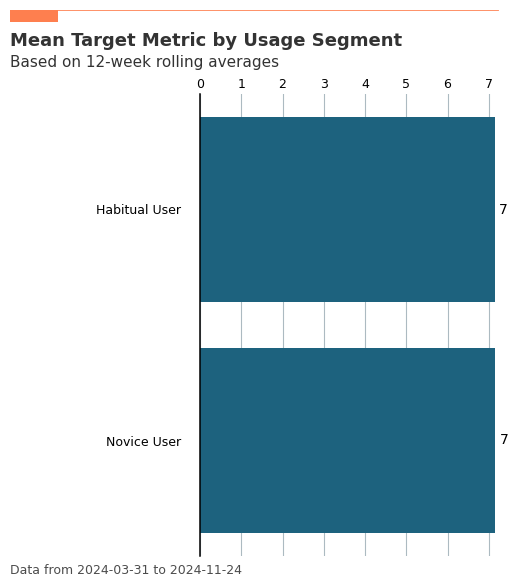

In [4]:
# Visualize the mean of `target_metric` by `UsageSegments_12w`
usage_segments_bar_plot = vi.create_bar(
    data=usage_segments_data,
    metric="target_metric",
    hrvar="UsageSegments_12w",
    return_type="plot",
    plot_title="Mean Target Metric by Usage Segment",
    plot_subtitle="Based on 12-week rolling averages"
)

# Display the bar plot
usage_segments_bar_plot.show()

### Visualize usage segments over time

We will now visualize the distribution of usage segments over time using the `identify_usage_segments` function with `return_type='plot'`.

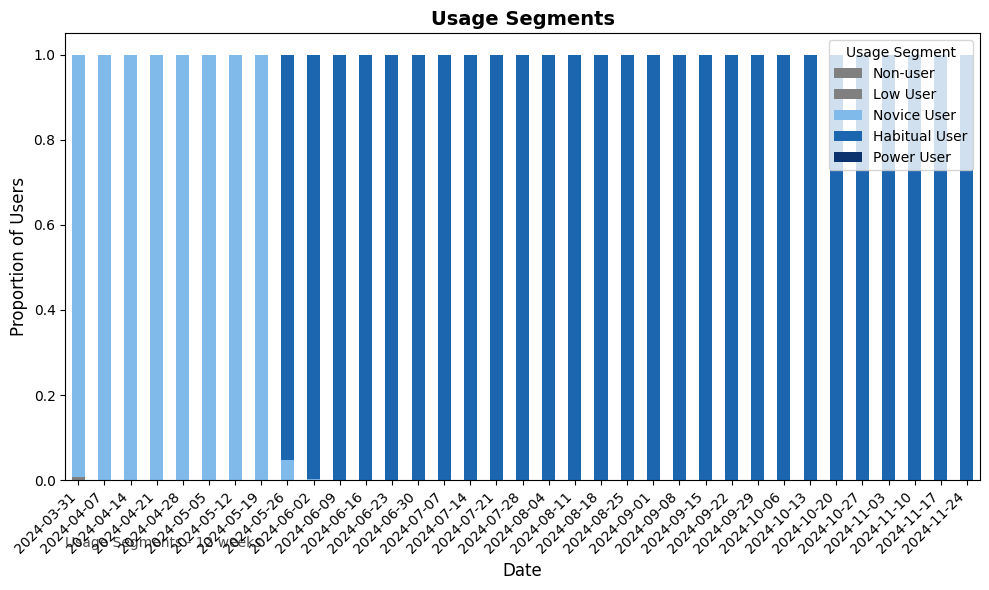

In [5]:
# Visualize usage segments over time
usage_segments_time_plot = vi.identify_usage_segments(
    data=pq_data,
    metric_str=[
        "Copilot_actions_taken_in_Teams",
        "Copilot_actions_taken_in_Outlook",
        "Copilot_actions_taken_in_Excel",
        "Copilot_actions_taken_in_Word",
        "Copilot_actions_taken_in_Powerpoint"
    ],
    version="12w",
    return_type="plot"
)

# Display the time plot
usage_segments_time_plot.show()

## Step 3: Compute favorability scores for ordinal metrics

Before calculating odds ratios, we will use the `compute_fav` function to convert ordinal metrics into categorical variables with favorable and unfavorable scores. This step ensures that the metrics are standardized to a 100-point scale, making it easier to handle different point scales and interpret results consistently.

The neutral scores will be dropped to focus on the extremes of favorability.

In [6]:
# Define the ordinal metrics
ordinal_metrics = [
    "eSat",
    "Initiative",
    "Manager_Recommend",
    "Resources",
    "Speak_My_Mind",
    "Wellbeing",
    "Work_Life_Balance",
    "Workload"
]

# Compute favorability scores
usage_segments_data = vi.compute_fav(
    data=usage_segments_data,
    ord_metrics=ordinal_metrics,
    item_options=5,  # Assuming a 5-point scale for ordinal metrics
    fav_threshold=70,
    unfav_threshold=40,
    drop_neutral=True
)

# Display the first few rows of the updated dataset
usage_segments_data.head()

,PersonId,MetricDate,Collaboration_hours,Copilot_actions_taken_in_Teams,Meeting_and_call_hours,Internal_network_size,Email_hours,Channel_message_posts,Conflicting_meeting_hours,Large_and_long_meeting_hours,...,Resources_100,Resources_fav,Speak_My_Mind_100,Speak_My_Mind_fav,Wellbeing_100,Wellbeing_fav,Work_Life_Balance_100,Work_Life_Balance_fav,Workload_100,Workload_fav
36,02723512-4f45-4385-8d1a-c23048e1e961,2024-04-07,26.310260,1,17.635230,124,10.887553,0.000000,3.322255,0.067661,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav
83,02c55079-f137-4abb-9806-f58e9b60efd6,2024-06-30,17.401642,4,10.399207,84,5.253439,0.195852,3.203440,0.975272,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav
123,02ddc980-8f37-4156-9397-6d621e445a00,2024-08-04,20.612899,3,14.130869,103,8.070390,0.577123,1.374351,0.000000,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav
135,02ddc980-8f37-4156-9397-6d621e445a00,2024-10-27,19.514361,2,10.986860,91,6.221707,2.286118,2.294472,0.391576,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav
164,032432ad-390c-4ce4-9f25-d5be080bd982,2024-09-15,34.160594,3,27.364673,182,12.926987,0.197464,6.306590,1.153810,...,25.0,unfav,25.0,unfav,100.0,fav,0.0,unfav,0.0,unfav


## Step 4: Calculate odds ratios for ordinal metrics

We will calculate odds ratios for the favorability scores of the following ordinal metrics:
- `eSat`
- `Initiative`
- `Manager_Recommend`
- `Resources`
- `Speak_My_Mind`
- `Wellbeing`
- `Work_Life_Balance`
- `Workload`

The independent variable will be `UsageSegments_12w`.

In [ ]:
# Reference the _100 versions of ordinal metrics
ordinal_metrics_100 = [f"{metric}_100" for metric in ordinal_metrics]

# Calculate odds ratios
odds_ratios_table = vi.create_odds_ratios(
    data=usage_segments_data,
    ord_metrics=ordinal_metrics_100, # Using the _100 versions
    metric="UsageSegments_12w",
    ord_item_options=5,  # Assuming a 5-point scale for ordinal metrics
    return_type="table"
)

# Display the odds ratios table
odds_ratios_table

,Ordinal_Metric,Odds_Ratio,Max_Level,Min_Level
2,Manager_Recommend,5.000000,100.0,0.0
4,Speak_My_Mind,3.800000,75.0,0.0
3,Resources,3.000000,75.0,0.0
5,Wellbeing,1.938776,100.0,75.0
1,Initiative,1.571429,75.0,0.0
0,eSat,0.428571,100.0,0.0
6,Work_Life_Balance,0.352785,25.0,0.0
7,Workload,0.317829,25.0,0.0


## Step 5: Visualize the odds ratios

We will create a bar plot to visualize the odds ratios for the ordinal metrics.

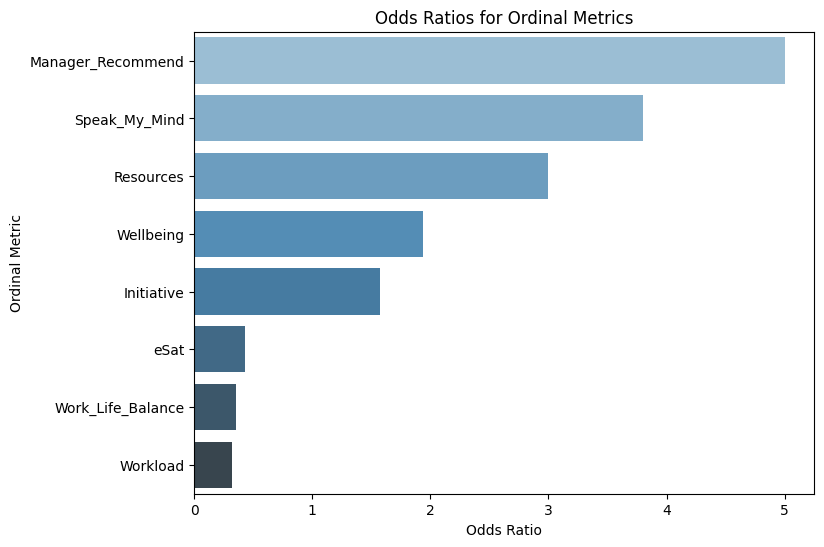

In [8]:
# Visualize odds ratios
odds_ratios_plot = vi.create_odds_ratios(
    data=usage_segments_data,
    ord_metrics=ordinal_metrics,
    metric="UsageSegments_12w",
    ord_item_options=5,
    return_type="plot"
)

# Display the plot
odds_ratios_plot.show()

## Summary

In this notebook, we demonstrated how to:
1. Load the demo data (`pq_data`).
2. Create an independent variable (`UsageSegments_12w`) using `identify_usage_segments`.
3. Compute favorability scores for ordinal metrics using `compute_fav`.
4. Calculate odds ratios for ordinal metrics using `create_odds_ratios`.
5. Visualize the results.

The `create_odds_ratios` function, combined with `compute_fav`, provides a powerful way to analyze the relationship between ordinal metrics and an independent variable, ensuring consistency and interpretability across different point scales.